<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.7 MB/s eta 0:00:00


FinalPrice: 62.499999999999986


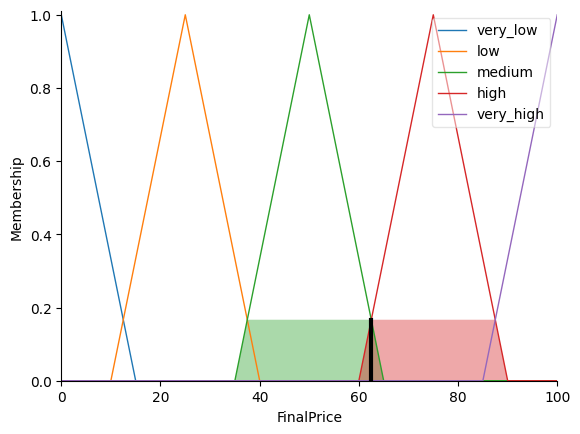

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


DemandLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'DemandLevel')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 101, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 101, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 13, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'StockLevel')

FinalPrice = ctrl.Consequent(np.arange(0, 101, 1), 'FinalPrice')

DemandLevel['low'] = fuzz.trimf(DemandLevel.universe, [0, 0, 30])
DemandLevel['medium'] = fuzz.trimf(DemandLevel.universe, [20, 50, 70])
DemandLevel['high'] = fuzz.trimf(DemandLevel.universe, [60, 100, 100])

CompetitorPricing['low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 30])
CompetitorPricing['medium'] = fuzz.trimf(CompetitorPricing.universe, [20, 50, 70])
CompetitorPricing['high'] = fuzz.trimf(CompetitorPricing.universe, [60, 100, 100])

ProductionCost['low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 30])
ProductionCost['medium'] = fuzz.trimf(ProductionCost.universe, [20, 50, 70])
ProductionCost['high'] = fuzz.trimf(ProductionCost.universe, [60, 100, 100])

Seasonality['off_peak'] = fuzz.trimf(Seasonality.universe, [0, 0, 4])
Seasonality['normal'] = fuzz.trimf(Seasonality.universe, [3, 6, 9])
Seasonality['peak'] = fuzz.trimf(Seasonality.universe, [8, 12, 12])

StockLevel['low'] = fuzz.trimf(StockLevel.universe, [0, 0, 30])
StockLevel['medium'] = fuzz.trimf(StockLevel.universe, [20, 50, 70])
StockLevel['high'] = fuzz.trimf(StockLevel.universe, [60, 100, 100])

FinalPrice['very_low'] = fuzz.trimf(FinalPrice.universe, [0, 0, 15])
FinalPrice['low'] = fuzz.trimf(FinalPrice.universe, [10, 25, 40])
FinalPrice['medium'] = fuzz.trimf(FinalPrice.universe, [35, 50, 65])
FinalPrice['high'] = fuzz.trimf(FinalPrice.universe, [60, 75, 90])
FinalPrice['very_high'] = fuzz.trimf(FinalPrice.universe, [85, 100, 100])

rules = [
    ctrl.Rule(DemandLevel['high'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['high'] & Seasonality['peak'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['high'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['high'] & Seasonality['peak'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['high'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(DemandLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['very_low']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['DemandLevel'] = 60
fuzzy_system.input['CompetitorPricing'] = 85
fuzzy_system.input['ProductionCost'] = 50
fuzzy_system.input['Seasonality'] = 10
fuzzy_system.input['StockLevel'] = 25

fuzzy_system.compute()

print('FinalPrice:',fuzzy_system.output['FinalPrice'])
FinalPrice.view(sim=fuzzy_system)

FinalPrice: 62.499999999999986


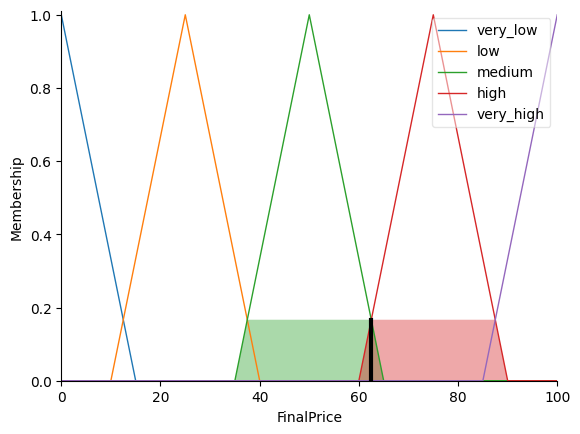

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


DemandLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'DemandLevel')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 101, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 101, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 13, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'StockLevel')

FinalPrice = ctrl.Consequent(np.arange(0, 101, 1), 'FinalPrice')

DemandLevel['low'] = fuzz.trimf(DemandLevel.universe, [0, 0, 30])
DemandLevel['medium'] = fuzz.trimf(DemandLevel.universe, [20, 50, 70])
DemandLevel['high'] = fuzz.trimf(DemandLevel.universe, [60, 100, 100])

CompetitorPricing['low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 30])
CompetitorPricing['medium'] = fuzz.trimf(CompetitorPricing.universe, [20, 50, 70])
CompetitorPricing['high'] = fuzz.trimf(CompetitorPricing.universe, [60, 100, 100])

ProductionCost['low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 30])
ProductionCost['medium'] = fuzz.trimf(ProductionCost.universe, [20, 50, 70])
ProductionCost['high'] = fuzz.trimf(ProductionCost.universe, [60, 100, 100])

Seasonality['off_peak'] = fuzz.trimf(Seasonality.universe, [0, 0, 4])
Seasonality['normal'] = fuzz.trimf(Seasonality.universe, [3, 6, 9])
Seasonality['peak'] = fuzz.trimf(Seasonality.universe, [8, 12, 12])

StockLevel['low'] = fuzz.trimf(StockLevel.universe, [0, 0, 30])
StockLevel['medium'] = fuzz.trimf(StockLevel.universe, [20, 50, 70])
StockLevel['high'] = fuzz.trimf(StockLevel.universe, [60, 100, 100])

FinalPrice['very_low'] = fuzz.trimf(FinalPrice.universe, [0, 0, 15])
FinalPrice['low'] = fuzz.trimf(FinalPrice.universe, [10, 25, 40])
FinalPrice['medium'] = fuzz.trimf(FinalPrice.universe, [35, 50, 65])
FinalPrice['high'] = fuzz.trimf(FinalPrice.universe, [60, 75, 90])
FinalPrice['very_high'] = fuzz.trimf(FinalPrice.universe, [85, 100, 100])

rules = [
    ctrl.Rule(DemandLevel['high'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['high'] & Seasonality['peak'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['high'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['high'] & Seasonality['peak'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['high'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(DemandLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['very_low']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['DemandLevel'] = 60
fuzzy_system.input['CompetitorPricing'] = 85
fuzzy_system.input['ProductionCost'] = 50
fuzzy_system.input['Seasonality'] = 10
fuzzy_system.input['StockLevel'] = 25

fuzzy_system.compute()

print('FinalPrice:',fuzzy_system.output['FinalPrice'])
FinalPrice.view(sim=fuzzy_system)

FinalPrice: 18.594104308390026


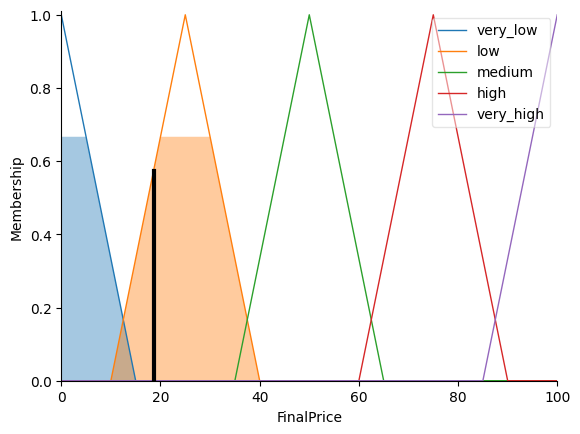

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


DemandLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'DemandLevel')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 101, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 101, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 13, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 101, 1), 'StockLevel')

FinalPrice = ctrl.Consequent(np.arange(0, 101, 1), 'FinalPrice')

DemandLevel['low'] = fuzz.trimf(DemandLevel.universe, [0, 0, 30])
DemandLevel['medium'] = fuzz.trimf(DemandLevel.universe, [20, 50, 70])
DemandLevel['high'] = fuzz.trimf(DemandLevel.universe, [60, 100, 100])

CompetitorPricing['low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 30])
CompetitorPricing['medium'] = fuzz.trimf(CompetitorPricing.universe, [20, 50, 70])
CompetitorPricing['high'] = fuzz.trimf(CompetitorPricing.universe, [60, 100, 100])

ProductionCost['low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 30])
ProductionCost['medium'] = fuzz.trimf(ProductionCost.universe, [20, 50, 70])
ProductionCost['high'] = fuzz.trimf(ProductionCost.universe, [60, 100, 100])

Seasonality['off_peak'] = fuzz.trimf(Seasonality.universe, [0, 0, 4])
Seasonality['normal'] = fuzz.trimf(Seasonality.universe, [3, 6, 9])
Seasonality['peak'] = fuzz.trimf(Seasonality.universe, [8, 12, 12])

StockLevel['low'] = fuzz.trimf(StockLevel.universe, [0, 0, 30])
StockLevel['medium'] = fuzz.trimf(StockLevel.universe, [20, 50, 70])
StockLevel['high'] = fuzz.trimf(StockLevel.universe, [60, 100, 100])

FinalPrice['very_low'] = fuzz.trimf(FinalPrice.universe, [0, 0, 15])
FinalPrice['low'] = fuzz.trimf(FinalPrice.universe, [10, 25, 40])
FinalPrice['medium'] = fuzz.trimf(FinalPrice.universe, [35, 50, 65])
FinalPrice['high'] = fuzz.trimf(FinalPrice.universe, [60, 75, 90])
FinalPrice['very_high'] = fuzz.trimf(FinalPrice.universe, [85, 100, 100])

rules = [
    ctrl.Rule(DemandLevel['high'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['high'] & Seasonality['peak'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['high'] & StockLevel['low'], FinalPrice['very_high']),
    ctrl.Rule(DemandLevel['high'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['high'] & Seasonality['peak'] & StockLevel['medium'], FinalPrice['high']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['high'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['medium'] & StockLevel['medium'], FinalPrice['medium']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['medium'] & ProductionCost['low'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['low']),
    ctrl.Rule(DemandLevel['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(DemandLevel['low'] & Seasonality['off_peak'] & StockLevel['high'], FinalPrice['very_low']),
    ctrl.Rule(DemandLevel['medium'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['very_low']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['DemandLevel'] = 10
fuzzy_system.input['CompetitorPricing'] = 10
fuzzy_system.input['ProductionCost'] = 30
fuzzy_system.input['Seasonality'] = 1
fuzzy_system.input['StockLevel'] = 95

fuzzy_system.compute()

print('FinalPrice:',fuzzy_system.output['FinalPrice'])
FinalPrice.view(sim=fuzzy_system)